### 1. Import Libraries

This cell imports all necessary libraries for data loading, preprocessing, model building, and visualization.


In [79]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import cv2

### 2. Load CIFAR-10 Dataset Dynamically

Specify the number of images for training and testing.


In [80]:
# Dynamic data control
train_size = 500  # Number of training images


def load_dynamic_data(train_size):
    (x_train_full, y_train_full), (x_test_full, y_test_full) = cifar10.load_data()

    # Select subset dynamically
    x_train = x_train_full[:train_size]
    y_train = y_train_full[:train_size]
    x_test = x_test_full[:train_size]
    y_test = y_test_full[:train_size]

    return (x_train, y_train), (x_test, y_test)


(x_train, y_train), (x_test, y_test) = load_dynamic_data(train_size)

### 3. Preprocess Data

Normalize the images and convert labels to one-hot encoding.


In [81]:
# Normalize images
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# One-hot encoding for labels
y_train_onehot = to_categorical(y_train, 10)
y_test_onehot = to_categorical(y_test, 10)

### 4. Visualize Sample Images

Display some training images with their labels.


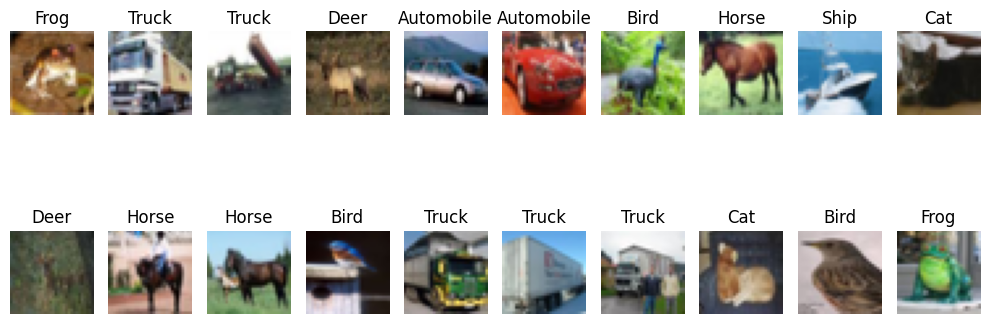

In [82]:
class_names = [
    "Airplane",
    "Automobile",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Ship",
    "Truck",
]



plt.figure(figsize=(10, 5))


for i in range(20):


    plt.subplot(2, 10, i + 1)

    # Resize the image to a smaller size
    resized_image = cv2.resize(x_train[i], (64, 64), interpolation=cv2.INTER_AREA)

    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis("off")


plt.tight_layout()
plt.show()
# image is pixelated because of the resizing of the image

### 5. Define CNN Model

Build a simple CNN architecture for classification.


In [83]:
cnn_model = Sequential(
    [
        Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),

        MaxPooling2D((2, 2)),
        Dropout(0.25),
        Conv2D(64, (3, 3), activation="relu"),
        MaxPooling2D((2, 2)),
        Dropout(0.25),
        Flatten(),
        Dense(128, activation="relu"),

        Dropout(0.5),
        Dense(10, activation="softmax"),
    ]
)



cnn_model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

### 6. Train the Model with Minimum Epochs

Train the CNN with 5 epochs.


In [84]:
history = cnn_model.fit(
    x_train,
    y_train_onehot,
    epochs=5,
    validation_data=(x_test, y_test_onehot),
    batch_size=32,
)

Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.1142 - loss: 2.3347 - val_accuracy: 0.0820 - val_loss: 2.2948
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.1378 - loss: 2.2793 - val_accuracy: 0.1620 - val_loss: 2.2732
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.1346 - loss: 2.2573 - val_accuracy: 0.1740 - val_loss: 2.2210
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.1608 - loss: 2.1975 - val_accuracy: 0.2760 - val_loss: 2.1691
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.2562 - loss: 2.0995 - val_accuracy: 0.2980 - val_loss: 2.0480


### 7. Creative Visualization of Performance

Display training history and confusion matrix.


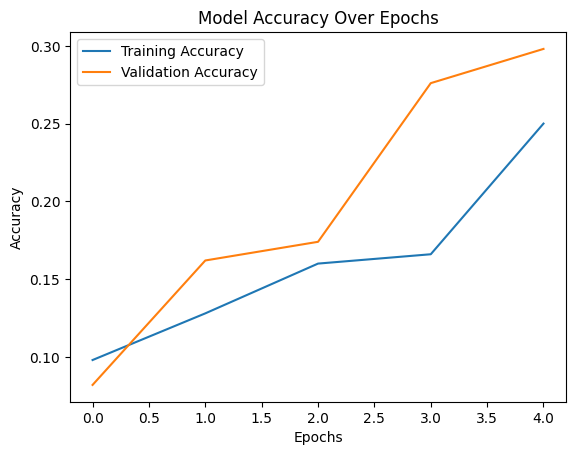

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


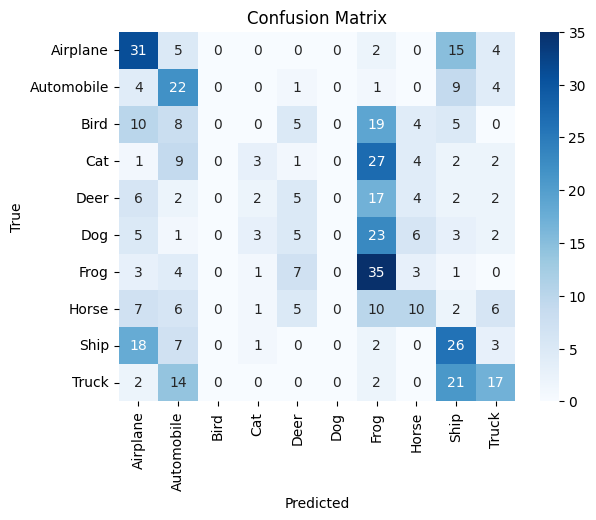

In [85]:
# Plot training and validation accuracy
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy Over Epochs")
plt.show()

# Confusion matrix
y_pred = np.argmax(cnn_model.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names,
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

### 8. Evaluate and Generate Report

Generate a classification report to summarize performance.


In [86]:
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

    Airplane       0.36      0.54      0.43        57
  Automobile       0.28      0.54      0.37        41
        Bird       0.00      0.00      0.00        51
         Cat       0.27      0.06      0.10        49
        Deer       0.17      0.12      0.14        40
         Dog       0.00      0.00      0.00        48
        Frog       0.25      0.65      0.36        54
       Horse       0.32      0.21      0.26        47
        Ship       0.30      0.46      0.36        57
       Truck       0.42      0.30      0.35        56

    accuracy                           0.30       500
   macro avg       0.24      0.29      0.24       500
weighted avg       0.24      0.30      0.25       500



c:\Users\al-wanes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\al-wanes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\al-wanes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av